___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Israel Castillo Herrera

###### Fecha: 5 de Noviembre del 2019

##### Por: Oscar David Jaramillo Z.

# 1.
Usando la información reportada en el archivo `Datos_b.csv`, responda las siguientes preguntas:

a). Usando el método de quantil-quantil (Q-Q), determine la distribución de probabilidad de cada una de las columnas que se encuentran en el archivo `Datos_b.csv`. (**Ayuda**: en canvas en la sección de páginas, se encuentran las diferentes posibilidades de las funciones de distribución que deben de probar para verificar que distribución siguen sus datos)

b). Según los resultados concluidos con el método quantil-quantil, use el método de máxima verosimilitud en python, para estimar los parámetros `loc` y `scale` de las tres distribuciones de probabilidad ajustadas. Compare los resultados usando el histograma de los datos, (use bins=60) y su respectiva función de densidad ajustada. Los resultados esperados para cada distribución se deben de reportar como sigue: 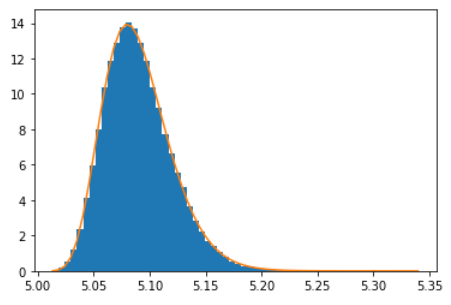


c). Use la prueba chi cuadrado - Usando el histograma (como se vió en clase), y los resultados del literal b) responda la siguiente prueba de hipótesis para cada distribución:
> $H_0$: la distribución es `distribución_i` con ´paramétro 1 = p1´ y ´parámetro 2 = p2 ´

> $H_a$: los datos no se distribuyen como `distribución_i`

Observe que `paramétro 1` y `paramétro 2` dependerán de cada una de las distribuciones seleccionadas, por ejemolo si la `distribución_i` fuera normal entonces  `paramétro 1` y `paramétro 2` serían la media $\mu$ y desviación estándar $\sigma$, respectivamente.**Nota:** Recuerde que el método de máxima verosimilitud puede estimar `loc` y `scale` únicamente o `loc` y `scale` y otros parámetros de la distribución a ajustar (ver por ejemplo Tarea clase 12, para aclarar).

In [58]:
import pandas as pd
import numpy as np
import scipy.stats as st     # Librería estadística
import matplotlib.pyplot as plt

In [441]:
data = pd.read_csv('Datos_b.csv')

In [442]:
data1=np.asarray(data.iloc[:,0])
data2=np.asarray(data.iloc[:,1])
data3=np.asarray(data.iloc[:,2])

## PRUEBA DE DISTRIBUCIONES 

In [443]:
## ESTE CODIGO --> PRUEBAS DE HIPÓTESIS CON DIFERENTES DISTRIBUCIONES, CON SAMPLES.

import scipy.stats as st
def get_best_distribution(data):
    dist_names = ['beta']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(data3) ## LLAMAR FUNCIÓN CON DATOS DE COLUMNA SELECTA.

/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p value for beta = 0.8286241503917767
Best fitting distribution: beta
Best p value: 0.8286241503917767
Parameters for the best fit: (9.08613200890765, 318603195.88537925, 4.999537493917811, 3172525.372425045)


('beta',
 0.8286241503917767,
 (9.08613200890765, 318603195.88537925, 4.999537493917811, 3172525.372425045))

### COLUMNA 1

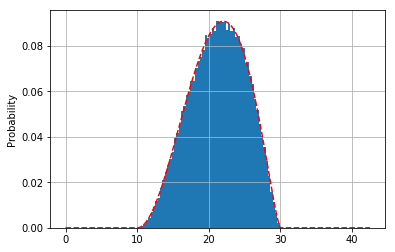

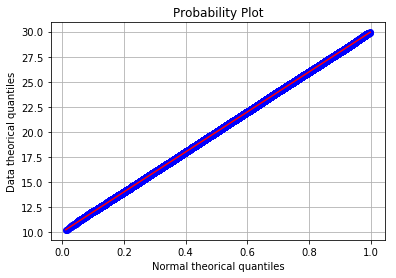

In [446]:
## COLUMNA 1
mu = np.mean(data1); sigma = np.std(data1)
measurements = data1
# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.arange(0,mu*2,.1)
y = st.beta.pdf(x,param[0], param[1], loc=param[2],scale=param[3])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='beta', plot=plt, sparams=(param[0], param[1]))
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()



Valor de chi cuadrado librería =  Power_divergenceResult(statistic=58.923019797201626, pvalue=0.47833298489878867)
Estadístico de chi_cuadrado =  75.62374846937608
Param s =  3.087826305577594
Param 1 =  2.3815989934739976
Param 2 =  10.01786116609589
Param 3 =  19.973615875492534


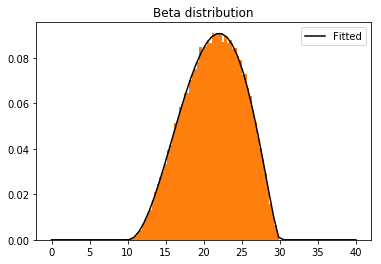

In [445]:
####################################################################

samp = data1
param = st.beta.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(0,40,60)
# fitted distribution
pdf_fitted = st.beta.pdf(x, param[0], param[1], loc=param[2],scale=param[3])

plt.title('Beta distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,60,density=1,alpha=.8,)
#plt.show()


J=60
[freq,x,p]=plt.hist(data1,J,density=True)
x = x[:-1] 
pi = st.beta.pdf(x,param[0], param[1], loc=param[2],scale=param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param s = ',param[0])
print('Param 1 = ',param[1])
print('Param 2 = ',param[2])
print('Param 3 = ',param[3])


> $H_0$: la distribución es `Beta` con a = 3.08 y b = 2.38, y Param3 = 10.01 y Param4 = 19.97

> $H_a$: los datos no se distribuyen como `Beta`

- **Distribuida como normal dada la prueba chi-square. No se rechaza la $H_o$**

## COLUMNA 2

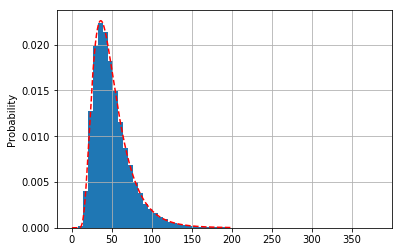

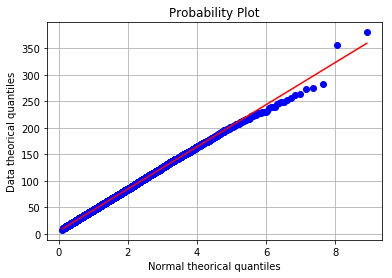

In [449]:
## COLUMNA 2
measurements = data2
# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.arange(0,200,.1)
y = st.lognorm.pdf(x, s=param[0], loc=param[1], scale=param[2])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='lognorm', plot=plt, sparams=(param[0]))
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()


Valor de chi cuadrado librería =  Power_divergenceResult(statistic=7.829555886968006, pvalue=0.9999999999999999)
Estadístico de chi_cuadrado =  75.62374846937608
Param s =  0.5031818919931621
Param 1 =  5.132289643813516
Param 2 =  39.790809858956536


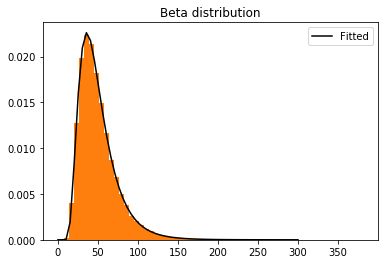

In [462]:
####################################################################

samp = data2
param = st.lognorm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(0,300,60)
# fitted distribution
pdf_fitted = st.lognorm.pdf(x, s=param[0], loc=param[1],scale=param[2])

plt.title('Beta distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,60,density=1,alpha=.8,)
#plt.show()


J=60
[freq,x,p]=plt.hist(data2,J,density=True)
x = x[:-1] 
pi = st.lognorm.pdf(x, s=param[0], loc=param[1],scale=param[2])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param s = ',param[0])
print('Param 1 = ',param[1])
print('Param 2 = ',param[2])


> $H_0$: la distribución es `Lognorm` con s = 0.50 , loc = 5.13 , scale = 39.79

> $H_a$: los datos no se distribuyen como `Lognorm`

- **Distribuida como normal dada la prueba chi-square. No se rechaza la $H_0$**

## COLUMNA 3

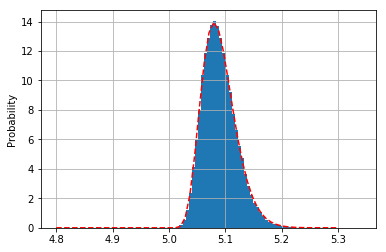

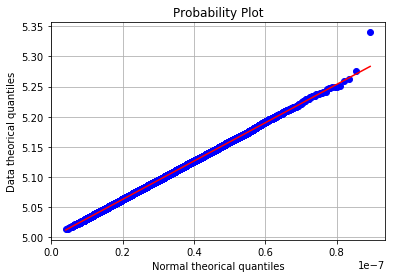

In [473]:
## COLUMNA 3
measurements = data3
# Histograma de las variables creadas
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(measurements,divisiones,density=True)
x = np.linspace(4.8,5.3,60)
y = st.beta.pdf(x, 9.08, 318603195.88537925, loc=4.999537493917811, scale=3172525.372425045)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

# gráfica de Q-Q entre las muestras creadas y una curva normal
grap1 = st.probplot(measurements, dist='beta', plot=plt, sparams=(param[0], param[1]))
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()



Valor de chi cuadrado librería =  Power_divergenceResult(statistic=604.2765658529419, pvalue=1.9873392643460483e-91)
Estadístico de chi_cuadrado =  75.62374846937608
Param 1 =  9.08613200890765
Param 2 =  318603195.88537925
Param 3 =  4.999537493917811
Param 4 =  3172525.372425045


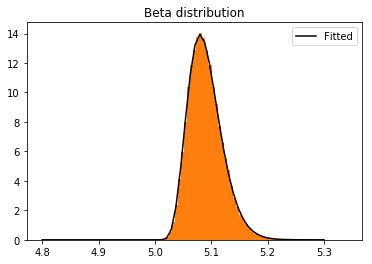

In [474]:
####################################################################

samp = data3
param = st.beta.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(4.8,5.3,60)
# fitted distribution
pdf_fitted = st.beta.pdf(x, param[0], param[1], loc=param[2],scale=param[3])

plt.title('Beta distribution')
plt.plot(x,pdf_fitted,'k-',label='Fitted')
plt.legend()
plt.hist(samp,60,density=1,alpha=.8,)
#plt.show()


J=60
[freq,x,p]=plt.hist(data3,J,density=True)
x = x[:-1] 
pi = st.beta.pdf(x,param[0], param[1], loc=param[2],scale=param[3])

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Param 1 = ',param[0])
print('Param 2 = ',param[1])
print('Param 3 = ',param[2])
print('Param 4 = ',param[3])


> $H_0$: la distribución es `Beta` con Param1 = 9.08 , Param2 = 318603195.88, Param3 = 4.99, Param4= 3172525.37

> $H_a$: los datos no se distribuyen como `Beta`

- **Aún cuando se ajusta a la distribución, no es posible aceptar con la prueba de chi-square la $H_0$. Utilizando diferentes distribuciones, ninguna da un mejor ajuste que la beta. Se utilizó el codigo del principio.**

# 2 
Se tiene la siguiente función de distribución de probabilidad acumulada
## $$ F(x) = \begin{cases}\frac{\sqrt{x}}{20}, & \text{si } 0\leq x\leq 100 \\
            \frac{x}{200}, & \text{si } 100 <x \leq 200 \\
            1, & \text{si } x>200 \end{cases}$$

En base a $F(x)$ responda los siguientes numerales y además reporte todos los cálculos utlizados, usando la sintáxis mardown (ecuaciones latex).

a). Usando el método de la transformada inversa, genere variables aleatorias que distribuyan según $f(x)$. Para validar los resultados obtenidos, grafique el histograma de 1000 muestras que distribuyen según $f(x)$ en conjunto la gráfica de $f(x)$.

b). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias. 

**Nota**: Recuerde que la distribución de poisson es una distribución de probabilidad discreta así que el histograma debe ser discreto y no continuo.

$$ F(x) = \begin{cases}\frac{\sqrt{x}}{20}, & \text{si } 0\leq x\leq 100 \\
            \frac{x}{200}, & \text{si } 100 <x \leq 200 \\
            1, & \text{si } x>200 \end{cases}$$


$$ \text{Inversa de F(x): }$$ 

$$ \ \ y = \frac{\sqrt{x}}{20} \ \ \ \therefore \ \ \ x= (20y)^2, \ \ \ \text{si } \ \  0\leq y\leq0.5 $$

$$ \ \ y=\frac{x}{200} \ \ \ \therefore \ \ \ x=200y, \ \ \ \text{si } \ \   0.5<y<1 $$

$$ \ \ y = 1 \ \ \ \therefore \ \ \ x=1, \ \ \ \text{si } \ \  y>1 $$

$$ \text{Estas funciones se utilizan para generar los números aleatorios que distribuyen a f(x)}$$

$$ \text{Si derivamos para encontrar "f(x)" (Función de Probabilidad)}$$

$$ f(x) = \begin{cases}\frac{1}{40\sqrt{x}}, & \text{si } \ \ 0\leq x\leq 100 \\
            \frac{1}{200}, & \text{si } \ \ 100 <x \leq 200 \\
            0, & \text{si } \ \ x>200 \end{cases}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### MÉTODO TRANSFORMADA INVERSA

In [2]:
N=1000
# FUNCIÓN DE DENSIDAD

def F(x):
    if x>=0 and x<=.5:
        F = (20*x)**2
    elif x>.5 and x<=1:
        F = 200*x
    else:
        F = 1
    return F
# FUNCIÓN DE PROBABILIDAD (DERIVDADA DE F(X))

def f(x):
    if x>=0 and x<=100:
        f = 1/(40*(np.sqrt(x)))
    elif x>100 and x<=200:
        f = 1/200
    else:
        f = 0
    return f

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


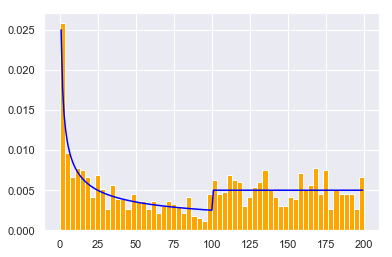

In [63]:
# NUMEROS ALEATORIOS DISTRIBUIDOS A f(x) POR TRANSFORMADA INVERSA.

y = np.arange(0,200,1)
X = np.random.uniform(0,1,N)
plt.plot(y,list(map(f,y)),label='f(x)', color= 'blue')
plt.hist(list(map(F,X)),bins=60, density=True, color='orange')
plt.show()

### MÉTODO ACEPTACIÓN RECHAZO

In [142]:
# FUNCIÓN DE LA PDF
def f(x):
    if x>=0 and x<=100:
        f = 1/(40*(np.sqrt(x)))
    elif x>100 and x<=200:
        f = 1/200
    else:
        f = 0
    return f

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


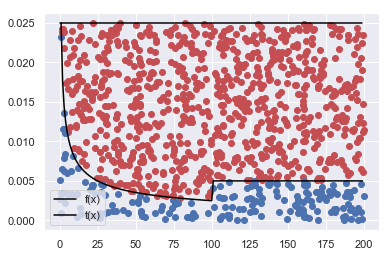

El máximo de f es: 0.025


In [260]:
x = np.arange(0,200,1)
# FUNCIÓN CONSTANTE EN MÁXIMO ARBITRARIO A 0.025
max_f = 0.025
t = lambda x: max_f*np.ones(len(x))  

#NUMEROS ALEATORIOS PARA LOS PUNTOS CONDICIONAL DE AC. Y RECH.
R1 = np.random.uniform(0,200,N)
R2 = np.random.uniform(0,1,N)

#FUNCIONES PARA CONDICIÓN
f_x = list(map(f,R1)) 
t_x = t(R1) 

#CONDICIÓN DE PUNTOS BAJO LA FUNCIÓN. NUMEROS ALEATORIOS DISTRIBUIDOS A f(x).
condition = np.multiply(R2,t_x)<=f_x
[plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'or') \
        for i in range(len(R1))]


# GRÁFICA DE LAS FUNCIONES DE PDF Y t MAYORA. (CON PUNTOS DE AC. Y RECH.)
plt.plot(x,list(map(f,x)),label='f(x)', color='black')
plt.plot(x,t(x) ,label='t(x)', color='black')
plt.legend()
plt.show()
print('El máximo de f es:',max_f)

# 3
Un banco, de acuerdo a la ley, tienen la posibilidad de poder invertir las utilidades logradas por créditos de trabajo quirografarios en dos diferentes instrumentos de inversión: El primero es inversión en deuda que presenta una utilidad promedio del 23.5% con una desviación estándar de 1.1%. El segundo es inversión a plazo donde la rentabilidad esperada se comporta como una distribución uniforme y está entre el -2% y el 9%, pero nunca entre -0.5% y 0.5%. Calcular cuál es la mejor combinación posible, si la inversión será en múltiplos de 25%, es decir (inv1 25%, Inv2 75%)-(Inv1 50%,Inv2 50%)-(Inv1 75%, Inv2 25%), simular 1000 veces (escenarios) e indicar rendimientos promedio por combinación.

In [55]:
N = 1000
deuda = np.random.normal(loc=.235,scale=.011, size=N)
plazo = np.random.uniform(-.02,.09, N)
for i in range(len(plazo)):
    if plazo[i]>-.005 and plazo[i]<.005:
        plazo[i] = 0

inver1= np.mean(0.25*deuda + .75*plazo)
inver2= np.mean(0.50*deuda + .50*plazo)
inver3= np.mean(0.75*deuda + .25*plazo)
inver = [inver1, inver2, inver3]

In [57]:
print('Promedio Portafolios 1: ', inver1, ', 2: ',inver2, ', 3: ',inver3 )
print('El mejor portafolio es con : ', np.amax(inver))

Promedio Portafolios 1:  0.08387034677770712 , 2:  0.13425931573634137 , 3:  0.18464828469497566
El mejor portafolio es con :  0.18464828469497566


# 4
Considere la siguiente función de distribución de probabilidad
$$ p_k = P\{X=k\}=\frac{3\,!}{k\,!(3-k)\,!}\big(\frac{1}{2}\big)^k\big(\frac{1}{2}\big)^{3-k}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.

<font color ='red'>  **Nota**: Recuerde que $p_k$ es una distribución de probabilidad discreta así que los histogramas realizados deben ser discretos y no continuos. Utilice la función `np.unique` y `plt.bar` para graficar correctamente el histograma </font>

b). Realice el desarrollo teórico para obtener muestras aletorias de esta dstribución usando el método de la función inversa. Con los resultados obtenidos, genere 100 muestras y  grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad f(x), para validar los resultados obtenidos. **Sugerencia**: Encentre una forma recursiva de la expresión $p_k$, y genere variables aleatorias usando la expresión obtenida

**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

c). Use el método de montecarlo crudo para estimar la media.

d). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

e). Use el método de los números complementarios.

f). Finalmente use el método de estratificación en el cúal se divide en N estratos.

g). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a). Se espera que reportes tus resultados como se muestra a continuación:
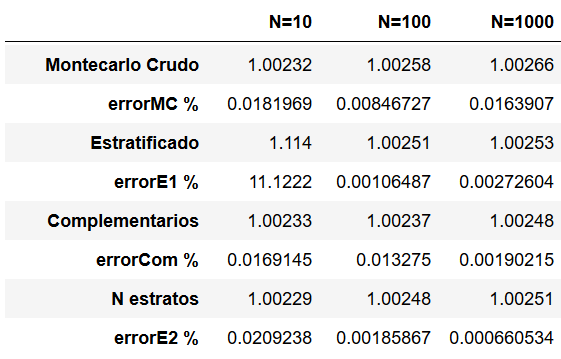

### INCISO A - ANALÍTICO

In [60]:
n = 3; p = 0.5
I = n*p
I

1.5

### INCISO B - GRAFICO

In [61]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    global Pr
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        global Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

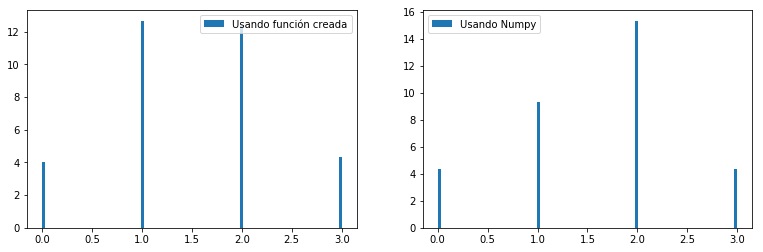

In [62]:
# def D_binomial_intermedia(n,p,N):
n = 3; p = 0.5; N = 100

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_binomial = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_binomial,100,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_bino_numpy = np.random.binomial(n,p,N)
plt.hist(d_bino_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()

### INCISO C - MONTECARLO CRUDO

In [63]:
# def D_binomial_intermedia(n,p,N):
n = 3; p = 0.5; N = np.logspace(1,7,4,dtype=int)
p_acum = P_acum_Binomial_o(n,p)
ui = list(map(lambda N:np.random.rand(N),N))

d_binomial = [list(map(lambda j:sum(1 for i in p_acum if i<N[j]),range(0, len(N)))) for N in ui]

means = [np.mean(d_binomial[i]) for i in range(len(N))]
means

df = pd.DataFrame(index=N,columns=['Montecarlo', 'Error_relativo1%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Montecarlo"] = means
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo"]-I)*100/I
df1=df
df1.T

Cantidad_terminos,10,1000,100000,10000000
Montecarlo,1.700000,1.482,1.499020,1.499932
Error_relativo1%,13.333333,1.200,0.065333,0.004527


### INCISO D - ESTRATOS

In [67]:
np.random.seed(556)
# GENERANDO 5 ESTRATOS CON DATOS DEL 10 - 100,000. (5 ESTRATOS X 4 N'S)
N = np.logspace(1,7,4,dtype=int)
r1 = list(map(lambda N: np.random.uniform(0,0.3,int(N*.20)),N))
r2 = list(map(lambda N: np.random.uniform(0.3,0.5,int(N*.20)),N))
r3 = list(map(lambda N: np.random.uniform(0.5,0.7,int(N*.25)),N))
r4 = list(map(lambda N: np.random.uniform(0.7,0.9, int(N*.15)),N))
r5 = list(map(lambda N: np.random.uniform(0.9,1,int(N*.20)),N))
r  = [r1,r2,r3,r4,r5] 

#GENERANDO W DE 10 - 100,000 NUMEROS (5 W'S X 4 N'S)

w1 = list(map(lambda N:.20*N/N/.3,N))
w2 = list(map(lambda N:.20*N/N/.2,N))
w3 = list(map(lambda N:.25*N/N/.2,N))
w4 = list(map(lambda N:.15*N/N/.2,N))
w5 = list(map(lambda N:.20*N/N/.1,N))
w = [w1,w2,w3,w4,w5]

d_binomial = [list(map(lambda j: list(map(lambda k: (sum(1 for i in p_acum[r] if i<N[j][k]), range(0,len(N[j])))))), 
                   range(0, len(N))) for N in r]



TypeError: map() must have at least two arguments.

### INCISO E - COMPLEMENTARIOS

In [8]:
# def D_binomial_intermedia(n,p,N):
n = 3; p = 0.5; N = np.logspace(1,7,4,dtype=int)
p_acum = P_acum_Binomial_o(n,p)
ui = list(map(lambda N:np.random.rand(N),N))
uicom=[1-x for x in ui]

d_binomial = [list(map(lambda j:sum(1 for i in p_acum if i<N[j]),range(0, len(N)))) for N in ui]
d_binomial_com = [list(map(lambda j:sum(1 for i in p_acum if i<N[j]),range(0, len(N)))) for N in uicom]


means = [np.mean(d_binomial[i]) for i in range(len(N))]
meanscom= [np.mean(d_binomial_com[i]) for i in range(len(N))]

df = pd.DataFrame(index=N,columns=['Complementario', 'Error_relativo1%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Complementario"] = [(x + y)/2 for x, y in zip(means, meanscom)]
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Complementario"]-I)*100/I
df2=df
df2.T

Cantidad_terminos,10,1000,100000,10000000
Complementario,1.5,1.5,1.5,1.5
Error_relativo1%,0.0,0.0,0.0,0.0


### INCISO F - N ESTRATOS


In [14]:
# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.rand(N),N))
i = list(map(lambda k: np.arange(0,k),N))
v = list(map(lambda ui,i,N: (ui+i)/N, ui,i,N))
xi = [list(map(lambda j:sum(1 for i in p_acum if i<N[j]),range(0, len(N)))) for N in ui]

mean = list(map(lambda m: np.mean(m),xi))


# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index = N, columns=['N estratos', 'Error_relativo1%'], dtype='float')
for i in range (0,len(N)):
    df.iloc[i]['N estratos']=float(mean[i])
    df.iloc[i]['Error_relativo1%']=abs((mean[i]-float((I)))/float((I))*100)
df3=df
df3.T

,10,1000,100000,10000000
N estratos,1.100000,1.550000,1.50054,1.499609
Error_relativo1%,26.666667,3.333333,0.03600,0.026053


In [15]:
dfTotal=pd.concat((df1,df2,df3), axis=1)
dfTotal.T

Cantidad_terminos,10,1000,100000,10000000
Montecarlo,1.800000,1.483000,1.496990,1.500039
Error_relativo1%,20.000000,1.133333,0.200667,0.002613
Complementario,1.500000,1.500000,1.500000,1.500000
Error_relativo1%,0.000000,0.000000,0.000000,0.000000
N estratos,1.100000,1.550000,1.500540,1.499609
Error_relativo1%,26.666667,3.333333,0.036000,0.026053


# 5
Utilice la siguiente integral para aproximar el valor de `e`
## $$ I = \int_0^1 e^x dx $$
## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase.
    
a). Use el método de montecarlo para aproximar el valor de pi para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *4*, para constrastar los resultados. Muestre los resultados en un dataframe como en el ejercicio *4-h)* y finalmente concluya  sus resultados.

In [227]:
dfTotal=pd.concat((df1,df2,df3, df4), axis=1)
dfTotal.T

Cantidad_terminos,10,1000,100000,10000000
Montecarlo,1.614405,1.718279,1.719679,1.718087
Error_relativo1%,6.045388,0.000190,0.081336,0.011340
Valor Euler Montecarlo,2.614405,2.718279,2.719679,2.718087
Error_relativo2%,3.821414,0.000120,0.051414,0.007168
Complementario,1.713177,1.716861,1.718375,1.718297
Error_relativo1%,0.297112,0.082692,0.005445,0.000881
Euler Complementario,2.713177,2.716861,2.718375,2.718297
Error_relativo2%,0.187811,0.052271,0.003442,0.000557
N estratos,1.669549,1.695793,1.718820,1.718409
Error_relativo1%,2.836141,1.308806,0.031329,0.007411


In [11]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

## METODO MONTECARLO CRUDO

In [13]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

I = np.exp(1)-np.exp(0)
T = np.exp(1)
# intervalo de integración
a = 0; b = 1

# Cantidad de términos
N = np.logspace(1,7,4,dtype=int)

# Números aleatorios 
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo 
I_m = list(map(lambda Y:int_montecarlo(lambda x:np.exp(x),a,b,Y),ui))

# Calculamos euler con compresión de listas, sumándole el 1 (matemáticamente)
e = [x+1 for x in I_m]

df = pd.DataFrame(index=N,columns=['Montecarlo', 'Error_relativo1%', 'Valor Euler Montecarlo', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Montecarlo"] = I_m
df.loc[N,"Valor Euler Montecarlo"] = e
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo"]-I)*100/I
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Valor Euler Montecarlo"]-T)*100/T
df1=df
df1.T

Cantidad_terminos,10,1000,100000,10000000
Montecarlo,1.614405,1.718279,1.719679,1.718087
Error_relativo1%,6.045388,0.000190,0.081336,0.011340
Valor Euler Montecarlo,2.614405,2.718279,2.719679,2.718087
Error_relativo2%,3.821414,0.000120,0.051414,0.007168


## REDUCCION VARIANZA

### COMPLEMENTARIOS

In [9]:
# Valores teóricos de la integral y euler.
I = np.exp(1)-np.exp(0)
T = np.exp(1)

# Números aleatorios y complementarios.
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
uicom=[1-x for x in ui]

# Calculamos el array de evaluaciones por aleatorios y complementarios.
I_m = list(map(lambda x:np.exp(x), ui))
I_mcom = list(map(lambda x:np.exp(x),uicom))

## Obteniendo la integral (media)
I_m= [np.mean(x) for x in I_m]
I_mcom= [np.mean(x) for x in I_mcom]

## Obteniendo el valor de euler
e = [x+1 for x in I_m]
ecom = [x+1 for x in I_mcom]

df = pd.DataFrame(index=N,columns=['Complementario', 'Error_relativo1%', 'Euler Complementario', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Complementario"] = [(x + y)/2 for x, y in zip(I_m, I_mcom)]
df.loc[N,"Euler Complementario"] = [(x + y)/2 for x, y in zip(e, ecom)]
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Complementario"]-I)*100/I
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Euler Complementario"]-T)*100/T
df2=df
df2.T

Cantidad_terminos,10,1000,100000,10000000
Complementario,1.713177,1.716861,1.718375,1.718297
Error_relativo1%,0.297112,0.082692,0.005445,0.000881
Euler Complementario,2.713177,2.716861,2.718375,2.718297
Error_relativo2%,0.187811,0.052271,0.003442,0.000557


### MUESTREO ESTRATIFICADO N

In [10]:
# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))
i = list(map(lambda k: np.arange(0,k),N))
v = list(map(lambda ui,i,N: (ui+i)/N, ui,i,N))
xi = list(map(lambda x:np.exp(x), ui) )
e = [x+1 for x in I_m]

mean = list(map(lambda m: np.mean(m),xi))
e_mean = list(map(lambda m: np.mean(m),e))


# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index = N, columns=['N estratos', 'Error_relativo1%','N estratos euler', 'Error_relativo2%'], dtype='float')
for i in range (0,len(N)):
    df.iloc[i]['N estratos']=float(mean[i])
    df.iloc[i]['Error_relativo1%']=abs((mean[i]-float((I)))/float((I))*100)
    df.iloc[i]['N estratos euler']=float(e_mean[i])
    df.iloc[i]['Error_relativo2%']=abs((e_mean[i]-float((T)))/float((T))*100)
df3=df
df3.T

,10,1000,100000,10000000
N estratos,1.669549,1.695793,1.718820,1.718409
Error_relativo1%,2.836141,1.308806,0.031329,0.007411
N estratos euler,2.917802,2.739001,2.716356,2.718289
Error_relativo2%,7.339934,0.762223,0.070838,0.000279


In [221]:
np.random.seed(556)
# GENERANDO 5 ESTRATOS CON DATOS DEL 10 - 100,000. (5 ESTRATOS X 4 N'S)
N = np.logspace(1,7,4,dtype=int)
r1 = list(map(lambda N: np.random.uniform(0,0.3,int(N*.20)),N))
r2 = list(map(lambda N: np.random.uniform(0.3,0.5,int(N*.20)),N))
r3 = list(map(lambda N: np.random.uniform(0.5,0.7,int(N*.25)),N))
r4 = list(map(lambda N: np.random.uniform(0.7,0.9, int(N*.15)),N))
r5 = list(map(lambda N: np.random.uniform(0.9,1,int(N*.20)),N))
r  = [r1,r2,r3,r4,r5] 
r2  = [r1,r2,r3,r4,r5] 

#GENERANDO W DE 10 - 100,000 NUMEROS (5 W'S X 4 N'S)

w1 = list(map(lambda N:.20*N/N/.3,N))
w2 = list(map(lambda N:.20*N/N/.2,N))
w3 = list(map(lambda N:.25*N/N/.2,N))
w4 = list(map(lambda N:.15*N/N/.2,N))
w5 = list(map(lambda N:.20*N/N/.1,N))
w = [w1,w2,w3,w4,w5]


In [220]:
### INTEGRAL ###
x=[]
for i in range(len(r)):
    for j in range(len(r[i])):
        r[i][j]=np.exp(r[i][j])/w[i][j] #modifica r en eval. con función y su peso específico de N's por estrato. 
        x.append((np.concatenate((r[0][j],r[1][j],r[2][j],r[3][j],r[4][j]))))
        #esta linea retira los términos de N's, de cada una de las listas de estratos.

x=x[-len(N):]
mean=[]
for i in range (0,len(N)):
    mean.append(np.mean(x[i]))
meanint=mean
meanint

[1.6759746616296443,
 1.7171702713416188,
 1.7182579428303517,
 1.7182857478622533]

In [222]:
#### EULER ###
x2=[]
for i in range(len(r2)):
    for j in range(len(r2[i])):
        r2[i][j]=(np.exp(r2[i][j])/w[i][j])
        x2.append((np.concatenate((r2[0][j],r2[1][j],r2[2][j],r2[3][j],r2[4][j])))) 

x2=x2[-len(N):]
e_mean=[]
for i in range (0,len(N)):
    e_mean.append(np.mean(x2[i])+1)
e_mean=e_mean
e_mean

[2.6759746616296445, 2.717170271341619, 2.718257942830352, 2.7182857478622533]

In [225]:
I = np.exp(1)-np.exp(0)
T = np.exp(1)
df = pd.DataFrame(index = N, columns=['5 estratos Pond', 'Error_relativo1%','5 estratos euler Pond', 'Error_relativo2%'], dtype='float')
for i in range (0,len(N)):
    df.iloc[i]['5 estratos Pond']=float(mean[i])
    df.iloc[i]['Error_relativo1%']=abs((mean[i]-float((I)))/float((I))*100)
    df.iloc[i]['5 estratos euler Pond']=float(e_mean[i])
    df.iloc[i]['Error_relativo2%']=abs((e_mean[i]-float((T)))/float((T))*100)
df4=df
df4.T

,10,1000,100000,10000000
5 estratos Pond,1.675975,1.717170,1.718258,1.718286
Error_relativo1%,2.462179,0.064690,0.001390,0.000228
5 estratos euler Pond,2.675975,2.717170,2.718258,2.718286
Error_relativo2%,1.556394,0.040892,0.000879,0.000144


**Valor de los ejercicios**
- 1- 3 puntos
- 2- 2 puntos
- 3- 1 punto
- 4- 4 puntos
- 5- 2 puntos


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>